In [ ]:
!tar xvf ViableGAN.tar #00010
!tar xvf NonTumorGAN.tar #00001
!tar xvf NonViableGAN.tar #00002

Streaming output truncated to the last 5000 lines.
content/results/00000-generate-images/seed2013.png
content/results/00000-generate-images/seed0078.png
content/results/00000-generate-images/seed4059.png
content/results/00000-generate-images/seed0153.png
content/results/00000-generate-images/seed3555.png
content/results/00000-generate-images/seed3338.png
content/results/00000-generate-images/seed0318.png
content/results/00000-generate-images/seed2532.png
content/results/00000-generate-images/seed0603.png
content/results/00000-generate-images/seed4566.png
content/results/00000-generate-images/seed2639.png
content/results/00000-generate-images/seed2148.png
content/results/00000-generate-images/seed3357.png
content/results/00000-generate-images/seed4208.png
content/results/00000-generate-images/seed3836.png
content/results/00000-generate-images/seed4623.png
content/results/00000-generate-images/seed0795.png
content/results/00000-generate-images/seed0022.png
content/results/00000-generate-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json, Model
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dropout, Activation, Flatten, Dense, BatchNormalization, ZeroPadding2D
#from keras.optimizers import Adam
from keras import backend as k
import tensorflow as tf

import os
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip "/content/gdrive/MyDrive/Colab Notebooks/sciencefair2022/Osteosarcoma-UT.zip"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/MyDrive/Colab Notebooks/sciencefair2022/Osteosarcoma-UT.zip
replace Osteosarcoma-UT/Training-Set-1/set1/Case-3-A10-17206-19249.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!mkdir dataset
!mkdir "dataset/ViableTumor"
!mkdir "dataset/NonViableTumor"
!mkdir "dataset/NonTumor"

!mkdir train
!mkdir "train/ViableTumor"
!mkdir "train/NonViableTumor"
!mkdir "train/NonTumor"

!mkdir test
!mkdir "test/ViableTumor"
!mkdir "test/NonViableTumor"
!mkdir "test/NonTumor"

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/ViableTumor’: File exists
mkdir: cannot create directory ‘dataset/NonViableTumor’: File exists
mkdir: cannot create directory ‘dataset/NonTumor’: File exists
mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘train/ViableTumor’: File exists
mkdir: cannot create directory ‘train/NonViableTumor’: File exists
mkdir: cannot create directory ‘train/NonTumor’: File exists
mkdir: cannot create directory ‘test’: File exists
mkdir: cannot create directory ‘test/ViableTumor’: File exists
mkdir: cannot create directory ‘test/NonViableTumor’: File exists
mkdir: cannot create directory ‘test/NonTumor’: File exists


In [ ]:
# Divide files into training and testing folders
# IMG_PATH = 'covid19dataset/' # unzipped folder
IMG_PATH = 'Osteosarcoma-UT/' # unzipped folder

print(IMG_PATH)
import os, shutil
import pandas as pd
# split the data by train/test
for dir1 in os.listdir(IMG_PATH):
  for dir2 in os.listdir(IMG_PATH + "/" + dir1):
    df = pd.read_csv(IMG_PATH + "/" + dir1 + "/" + dir2 + "/PathologistValidation.csv", names=['image', 'class'])
   # print(df["class"])
    for i, row in df.iterrows():
      imgname = row["image"]
      imgname = imgname.replace(" ", "-")
      #print(imgname)
      if row["class"] == "Viable":
        img = IMG_PATH + "/" + dir1 + "/" + dir2 + "/" + imgname
        if os.path.exists(img):
          shutil.copy(img, 'dataset/' + "ViableTumor" + "/" + imgname)
      elif row["class"] == "Non-Viable-Tumor":
        img = IMG_PATH + "/" + dir1 + "/" + dir2 + "/" + imgname
        if os.path.exists(img):
          shutil.copy(img, 'dataset/' + "NonViableTumor" + "/" + imgname)
      elif row["class"] == "Non-Tumor":
        img = IMG_PATH + "/" + dir1 + "/" + dir2 + "/" + imgname
        if os.path.exists(img):
          shutil.copy(img, 'dataset/' + "NonTumor" + "/" + imgname)

Osteosarcoma-UT/


In [ ]:
# Divide files into training and testing folders
# IMG_PATH = 'covid19dataset/' # unzipped folder
IMG_PATH = 'dataset/' # unzipped folder

print(IMG_PATH)
import os, shutil
# split the data by train/test
for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
      dir  = os.path.isdir(IMG_PATH + CLASS)
      if dir:
        IMG_NUM = len(os.listdir(IMG_PATH + CLASS))
        for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH + CLASS)):
            img = IMG_PATH + CLASS + '/' + FILE_NAME
            if n < 0.9*IMG_NUM:
                shutil.copy(img, 'train/' + CLASS + '/' + FILE_NAME)
            else:
                shutil.copy(img, 'test/'+ CLASS + '/' + FILE_NAME)

dataset/


In [ ]:
trainviablecount = sum(len(files) for _, _, files in os.walk(r'/content/train/ViableTumor'))
trainnonviablecount = sum(len(files) for _, _, files in os.walk(r'/content/train/NonViableTumor'))
trainnonecount = sum(len(files) for _, _, files in os.walk(r'/content/train/NonTumor'))

testviablecount = sum(len(files) for _, _, files in os.walk(r'/content/test/ViableTumor'))
testnonviablecount = sum(len(files) for _, _, files in os.walk(r'/content/test/NonViableTumor'))
testnonecount = sum(len(files) for _, _, files in os.walk(r'/content/test/NonTumor'))

print(trainviablecount, trainnonviablecount, trainnonecount)
print(testviablecount, testnonviablecount, testnonecount)

81 235 360
9 26 40


In [ ]:
imgcount = sum(len(files) for _, _, files in os.walk(r'/content/content/results/00010-generate-images'))
print(imgcount)

IMG_PATH = '/content/content/results/00010-generate-images'
count = 0

for img in os.listdir(IMG_PATH):
  #print(img)
  if count < (1001-trainviablecount):
   # print(count)
    if not img.startswith('.'):
      shutil.copy(IMG_PATH + '/' + img, '/content/train/ViableTumor')
      #print(img)
  else:
    break
  count+=1
print(count)

4825
920


In [ ]:
imgcount = sum(len(files) for _, _, files in os.walk(r'/content/content/results/00000-generate-images'))
print(imgcount)

IMG_PATH = '/content/content/results/00000-generate-images'
count = 0

for img in os.listdir(IMG_PATH):
  #print(img)
  if count < (1000-trainnonecount):
    if not img.startswith('.'):
      shutil.copy(IMG_PATH + '/' + img, '/content/train/NonTumor')
      #print(img)
  else:
    break
  count+=1
print(count)

4825
640


In [ ]:
imgcount = sum(len(files) for _, _, files in os.walk(r'/content/content/results/00001-generate-images'))
print(imgcount)

IMG_PATH = '/content/content/results/00001-generate-images'
count = 0

for img in os.listdir(IMG_PATH):
  #print(img)
  if count < (1001-trainnonviablecount):
    if not img.startswith('.'):
      shutil.copy(IMG_PATH + '/' + img, '/content/train/NonViableTumor')
      #print(img)
  else:
    break
  count+=1
print(count)

4825
766


In [ ]:
#from sklearn.model_selection import train_test_split

#x =
#y =

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)


In [ ]:
#!rm -rf /content/train/NonViableTumor
#!rm -rf /content/test/NonViableTumor

#print("deleted")

deleted


In [ ]:
# dimensions of our images
img_width, img_height = 224, 224
img_size = (224, 224)

# Saving the batch_size and epochs for training to variables
batch_size = 16 #usually in powers of 2 - 8, 16, 32, 64, 128
epochs = 50
lr = 0.0000001
class_array = ['NonTumor', 'ViableTumor', 'NonViableTumor']
#class_array = ['NonTumor', 'ViableTumor']
num_classes = len(class_array)

viable_file_count = sum(len(files) for _, _, files in os.walk(r'/content/train/ViableTumor'))
non_viable_file_count = sum(len(files) for _, _, files in os.walk(r'/content/train/NonViableTumor'))
non_file_count = sum(len(files) for _, _, files in os.walk(r'/content/train/NonTumor'))

print("Number of files in viable tumor ", viable_file_count)
print("Number of files in non viable tumor ", non_viable_file_count)
print("Number of files in non tumor ", non_file_count)

Number of files in viable tumor  1001
Number of files in non viable tumor  1001
Number of files in non tumor  1000


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, #normalization
                                   validation_split=0.15,
                                   shear_range = 0.2, # extent of shearing - 20%
                                   zoom_range = 0.2, # extent of adjusting the zoom in images - 20%
                                   horizontal_flip= True, # randomly flipping to get mirror images
                                   rotation_range=0.1)

valid_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.15)

In [ ]:
# Create a flow from the directory using same seed and 'training' subset.
train_generator = train_datagen.flow_from_directory('train',
                                              subset='training',
                                              shuffle=True,
                                              seed=42,
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              classes = class_array)

# Create a flow from the directory for validation data - seed=42
validation_generator = valid_datagen.flow_from_directory('train',
                                              subset='validation',
                                              seed=42,
                                              target_size=img_size,
                                              batch_size = batch_size,
                                              class_mode='categorical',
                                              classes = class_array)

Found 2552 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


##xception

In [ ]:
from keras.applications.xception import Xception

xception_pre_trained_model = Xception(input_shape = (224,224,3),
                              include_top = False,
                              weights = 'imagenet')

for layer in xception_pre_trained_model.layers:
    layer.trainable = False

xception_pre_trained_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
def build_my_model(model_name):

    new_model = Sequential()
    model = model_name
    new_model.add(model)
    new_model.add(Flatten())
    new_model.add(Dense(1024, activation='relu'))
    new_model.add(Dropout(0.1))
    new_model.add(Dense(512, activation='relu'))
    new_model.add(Dropout(0.1))
    new_model.add(Dense(256, activation='relu'))
    new_model.add(Dropout(0.1))
    new_model.add(Dense(num_classes, activation='softmax'))
    return new_model

my_xception_model = build_my_model(xception_pre_trained_model)

my_xception_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_24 (Dense)            (None, 1024)              102761472 
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)              

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

optimizer = tf.keras.optimizers.Adam(lr = lr) # RMSprop(learning_rate=1e-4)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

weight_path = "xception_b16_bestweights.hdf5".format('class')

checkpoint = ModelCheckpoint(weight_path,
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'auto',
                             save_weights_only = True)

early = EarlyStopping(monitor= 'val_loss',
                      mode= 'auto',
                      patience=10)

callbacks_list = [checkpoint, early]


my_xception_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = my_xception_model.fit(train_generator,
                          validation_data = validation_generator,
                          batch_size = batch_size,
                          epochs = epochs,
                          callbacks = callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
160/160 [==============================] - ETA: 0s - loss: 1.2625 - accuracy: 0.3319
Epoch 1: val_loss improved from inf to 1.06809, saving model to xception_b16_bestweights.hdf5
160/160 [==============================] - 47s 279ms/step - loss: 1.2625 - accuracy: 0.3319 - val_loss: 1.0681 - val_accuracy: 0.4333
Epoch 2/100
160/160 [==============================] - ETA: 0s - loss: 1.2078 - accuracy: 0.3719
Epoch 2: val_loss improved from 1.06809 to 1.04360, saving model to xception_b16_bestweights.hdf5
160/160 [==============================] - 43s 270ms/step - loss: 1.2078 - accuracy: 0.3719 - val_loss: 1.0436 - val_accuracy: 0.4867
Epoch 3/100
160/160 [==============================] - ETA: 0s - loss: 1.1979 - accuracy: 0.3723
Epoch 3: val_loss improved from 1.04360 to 1.02195, saving model to xception_b16_bestweights.hdf5
160/160 [==============================] - 43s 271ms/step - loss: 1.1979 - accuracy: 0.3723 - val_loss: 1.0219 - val_accuracy: 0.5156
Epoch 4/100
160/1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


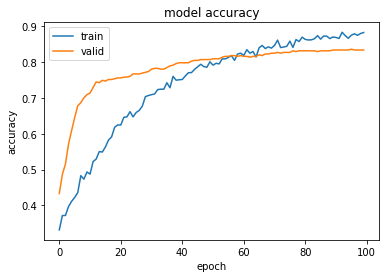

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

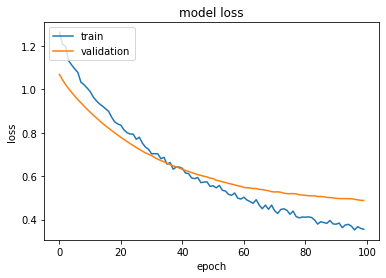

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a flow from the directory for validation data - seed=42
test_generator = test_datagen.flow_from_directory('test',
                                              target_size= (224,224),
                                              batch_size = 1,
                                              shuffle = False,
                                              class_mode='categorical',
                                              classes = class_array)


my_xception_model.evaluate(test_generator)

Found 75 images belonging to 3 classes.
75/75 [==============================] - 2s 31ms/step - loss: 0.2324 - accuracy: 0.9200


[0.23243433237075806, 0.9200000166893005]

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       0.90      1.00      0.95         9
           2       1.00      0.77      0.87        26

    accuracy                           0.92        75
   macro avg       0.93      0.92      0.92        75
weighted avg       0.93      0.92      0.92        75

accuracy:  0.92
[[40  0  0]
 [ 0  9  0]
 [ 5  1 20]]


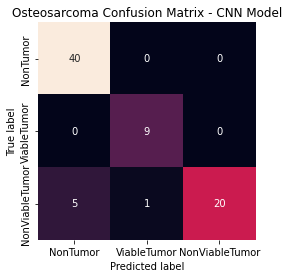

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
y_true = test_generator.classes
probabilities = my_xception_model.predict(test_generator)
y_pred = probabilities.argmax(axis = 1)
# Classification report will show us precision, recall and F1 Score of the model
print(classification_report(y_true, y_pred))

accuracy = accuracy_score(y_true, y_pred)
print('accuracy: ', accuracy)

conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

cm_df = pd.DataFrame(conf_mat,
                     index = class_array,
                     columns = class_array)

plt.figure()
sns.heatmap(cm_df, annot=True, square=True, cbar=False, fmt="d")
plt.title('Osteosarcoma Confusion Matrix - CNN Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

75/75 [==============================] - 2s 29ms/step - loss: 0.2324 - accuracy: 0.9200
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       0.90      1.00      0.95         9
           2       1.00      0.77      0.87        26

    accuracy                           0.92        75
   macro avg       0.93      0.92      0.92        75
weighted avg       0.93      0.92      0.92        75

accuracy:  0.92
[[40  0  0]
 [ 0  9  0]
 [ 5  1 20]]


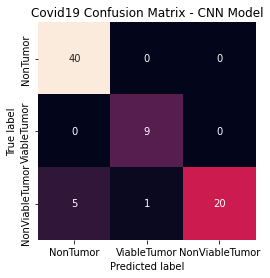

In [ ]:
my_xception_model.evaluate(test_generator)

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
y_true = test_generator.classes
probabilities = my_xception_model.predict(test_generator)
y_pred = probabilities.argmax(axis = 1)
# Classification report will show us precision, recall and F1 Score of the model
print(classification_report(y_true, y_pred))

accuracy = accuracy_score(y_true, y_pred)
print('accuracy: ', accuracy)

conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

cm_df = pd.DataFrame(conf_mat,
                     index = class_array,
                     columns = class_array)

plt.figure()
sns.heatmap(cm_df, annot=True, square=True, cbar=False, fmt="d")
plt.title('Covid19 Confusion Matrix - CNN Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

densenet


In [ ]:
from tensorflow.keras.applications import DenseNet201

densenet201_pre_trained_model = DenseNet201(input_shape = (224,224,3),
                              include_top = False, # not using the classification that is happening in the model
                              weights = 'imagenet') # use weights that the models were trained for
                              # weights -

for layer in densenet201_pre_trained_model.layers:
    layer.trainable = False # for each layer in the pre-trained model, each layer isn't being trained since the weights are already being used --- no need to retrain again

densenet201_pre_trained_model.summary()

74850304/74836368 [==============================] - 2s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_7[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

In [ ]:
def build_my_model(model_name):

    new_model = Sequential()
    model = model_name
    new_model.add(model)
    new_model.add(Flatten()) # flattens into a 1D array....
    new_model.add(Dense(1024, activation='relu')) # kind of like a connection between layers?? -- helps with extracting features
    new_model.add(Dropout(0.1)) # random nodes(weights) are dropped out --> weights are made to 0 -- helps reduce overfitting
    # overfitting is when the model can predict the training data set very accurately but might fail with a new unknown dataset
    new_model.add(Dense(512, activation='relu')) # activation function send out the output - relu (rectified linear unit) ReLU - _/-
    new_model.add(Dropout(0.1))
    new_model.add(Dense(256, activation='relu'))
    new_model.add(Dropout(0.1))
    new_model.add(Dense(num_classes, activation='softmax')) # softmax is like cubic function - used for classifying >=3
    return new_model

my_densenet201_model = build_my_model(densenet201_pre_trained_model) # building a model based on the densenet201

my_densenet201_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_7 (Flatten)         (None, 94080)             0         
                                                                 
 dense_28 (Dense)            (None, 1024)              96338944  
                                                                 
 dropout_21 (Dropout)        (None, 1024)              0         
                                                                 
 dense_29 (Dense)            (None, 512)               524800    
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 256)              

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

optimizer = tf.keras.optimizers.Adam(lr = lr) # RMSprop(learning_rate=1e-4)
loss = 'categorical_crossentropy' # categorical because we are classifying into more than 2. if it were 2, it would binary crossentropy -------- is a synonym to softmax loss
metrics = ['accuracy']

weight_path = "densenet201_b16_bestweights.hdf5".format('class')

checkpoint = ModelCheckpoint(weight_path,
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'auto',
                             save_weights_only = True)

early = EarlyStopping(monitor= 'val_loss',
                      mode= 'auto',
                      patience=10) # if loss doesn't improve for 10 epochs straight, model stops training

callbacks_list = [checkpoint, early] # creates a checkpoint between each epoch


my_densenet201_model.compile(optimizer=optimizer, loss=loss, metrics=metrics) # compiling model

history = my_densenet201_model.fit(train_generator,
                          validation_data = validation_generator,
                          batch_size = batch_size,
                          epochs = epochs,
                          callbacks = callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
160/160 [==============================] - ETA: 0s - loss: 1.1512 - accuracy: 0.3868
Epoch 1: val_loss improved from inf to 1.10070, saving model to densenet201_b16_bestweights.hdf5
160/160 [==============================] - 62s 301ms/step - loss: 1.1512 - accuracy: 0.3868 - val_loss: 1.1007 - val_accuracy: 0.4000
Epoch 2/50
160/160 [==============================] - ETA: 0s - loss: 1.0262 - accuracy: 0.4777
Epoch 2: val_loss improved from 1.10070 to 1.02509, saving model to densenet201_b16_bestweights.hdf5
160/160 [==============================] - 45s 279ms/step - loss: 1.0262 - accuracy: 0.4777 - val_loss: 1.0251 - val_accuracy: 0.4778
Epoch 3/50
160/160 [==============================] - ETA: 0s - loss: 0.9257 - accuracy: 0.5811
Epoch 3: val_loss improved from 1.02509 to 0.96732, saving model to densenet201_b16_bestweights.hdf5
160/160 [==============================] - 45s 278ms/step - loss: 0.9257 - accuracy: 0.5811 - val_loss: 0.9673 - val_accuracy: 0.5356
Epoch 4/50


In [ ]:
DenseNet_model_json = my_densenet201_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(DenseNet_model_json)

# serialize weights to HDF5
my_densenet201_model.save_weights("model.h5")
print("Saved model to disk")

# save model and architecture to single file
my_densenet201_model.save("my_densenet201_model_b16.h5")
print("Saved full model to disk")

Saved model to disk
Saved full model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


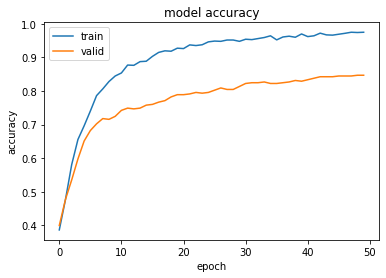

In [ ]:
# prints what the history has stored (stored in a dictionary format (key-value pairs))
print(history.history.keys())

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

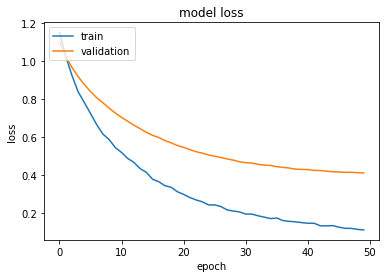

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
from keras.models import load_model #to load the model saved as a h5 file
# load model
densenet201_full_model = build_my_model(densenet201_pre_trained_model)

densenet201_full_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

densenet201_full_model.load_weights('densenet201_b16_bestweights.hdf5')
# summarize model.
densenet201_full_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_8 (Flatten)         (None, 94080)             0         
                                                                 
 dense_32 (Dense)            (None, 1024)              96338944  
                                                                 
 dropout_24 (Dropout)        (None, 1024)              0         
                                                                 
 dense_33 (Dense)            (None, 512)               524800    
                                                                 
 dropout_25 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 256)              

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a flow from the directory for validation data - seed=42
test_generator = test_datagen.flow_from_directory('test',
                                              target_size= (224,224),
                                              batch_size = 1,
                                              shuffle = False,
                                              class_mode='categorical',
                                              classes = class_array)


Found 75 images belonging to 3 classes.


In [ ]:
my_densenet201_model.evaluate(test_generator) # using model on testing dataset

75/75 [==============================] - 3s 35ms/step - loss: 0.1268 - accuracy: 0.9733


[0.12679259479045868, 0.9733333587646484]

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      1.00      1.00         9
           2       1.00      0.92      0.96        26

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.98        75
weighted avg       0.97      0.97      0.97        75

accuracy:  0.9733333333333334
[[40  0  0]
 [ 0  9  0]
 [ 2  0 24]]


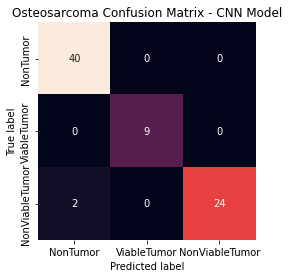

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix # ask parents

y_true = test_generator.classes
probabilities = my_densenet201_model.predict(test_generator)
y_pred = probabilities.argmax(axis = 1)
# Classification report will show us precision, recall and F1 Score of the model
print(classification_report(y_true, y_pred))

accuracy = accuracy_score(y_true, y_pred)
print('accuracy: ', accuracy)

conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

cm_df = pd.DataFrame(conf_mat,
                     index = class_array,
                     columns = class_array)

plt.figure()
sns.heatmap(cm_df, annot=True, square=True, cbar=False, fmt="d")
plt.title('Osteosarcoma Confusion Matrix - CNN Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()